In [34]:
#loading data
# from blog http://benalexkeen.com/linear-regression-in-python-using-scikit-learn/
import pandas as pd
dfo = pd.read_csv('C:\\Users\\rajsi\\Downloads\\autompg-dataset\\auto-mpg.csv')
print(dfo.head())
df= dfo.copy()

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [2]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [3]:
#creating columns for origin using dummies
df['origin']=df['origin'].replace({1: 'america',2:'europe',3:'asia'})
df = pd.get_dummies(df, columns=['origin'])
df= df.drop('car name',axis=1)

print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin_america  origin_asia  origin_europe  
0               1            0              0  
1               1            0              0  
2               1            0              0  
3               1            0              0  
4               1            0              0  


In [4]:
#dropping values given by ? in horssepower field and converting to int64
import numpy as np

df = df.replace('?', np.nan)
df = df.dropna()
df["horsepower"] = pd.to_numeric(df["horsepower"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
mpg               392 non-null float64
cylinders         392 non-null int64
displacement      392 non-null float64
horsepower        392 non-null int64
weight            392 non-null int64
acceleration      392 non-null float64
model year        392 non-null int64
origin_america    392 non-null int64
origin_asia       392 non-null int64
origin_europe     392 non-null int64
dtypes: float64(3), int64(7)
memory usage: 33.7 KB


In [6]:
X = df.drop('mpg', axis=1)
y = df[['mpg']]

from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)   #getting testing data

In [28]:
#fitting model

from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
regression_model.score(X_test, y_test)  #accuracy is 82.85%

0.8285231316459774

In [31]:
regression_model.predict([[4, 121, 110, 2800, 15.4, 81, 0, 1, 0]])   #predicting an imaginary car mpg is 28
#The car above is the information for a Saab 900s and it turns out that this is quite close to the actual mpg of 26 mpg for this car.

array([[28.6713418]])

In [ ]:
#Starting visualisation

In [27]:
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




In [12]:
a, b = np.polyfit(X['weight'], y, deg=1)  #to obtain a and b i.e slope and intercept
f = lambda x: a*x + b

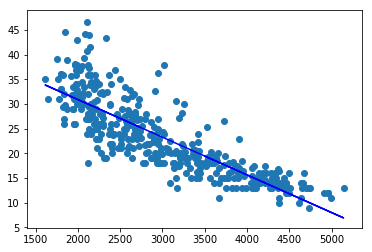

In [25]:
abline_values = [a * i + b for i in X['weight']] #ax+b

# Plot the best fit line over the actual values
plt.plot(X['weight'], abline_values, 'b')
plt.scatter(X['weight'],y)


In [48]:
#data scaling

dfo = dfo.replace('?', np.nan)
dfo = dfo.dropna()
dfo["horsepower"] = pd.to_numeric(dfo["horsepower"])

def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b
data_scale = dfo.copy()
data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])

data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,chevrolet chevelle malibu
1,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,buick skylark 320
2,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,plymouth satellite
3,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,amc rebel sst
4,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,ford torino


In [49]:
data_scale['origin']=data_scale['origin'].replace({1: 'USA',2:'Europe',3:'Japan'})
data_scale.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,0.478723,4,0.186047,0.217391,0.333711,0.452381,82,USA,ford mustang gl
394,0.930851,4,0.074935,0.032609,0.146583,0.988095,82,Europe,vw pickup
395,0.611702,4,0.173127,0.206522,0.193365,0.214286,82,USA,dodge rampage
396,0.505319,4,0.134367,0.179348,0.286929,0.630952,82,USA,ford ranger
397,0.585106,4,0.131783,0.195652,0.313864,0.678571,82,USA,chevy s-10


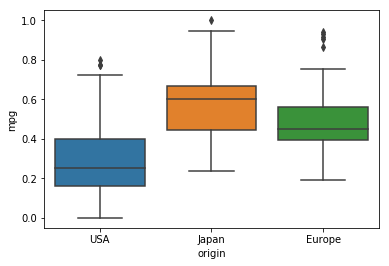

In [51]:
fig = sns.boxplot(x=data_scale['origin'], y=data_scale["mpg"], data=data_scale)

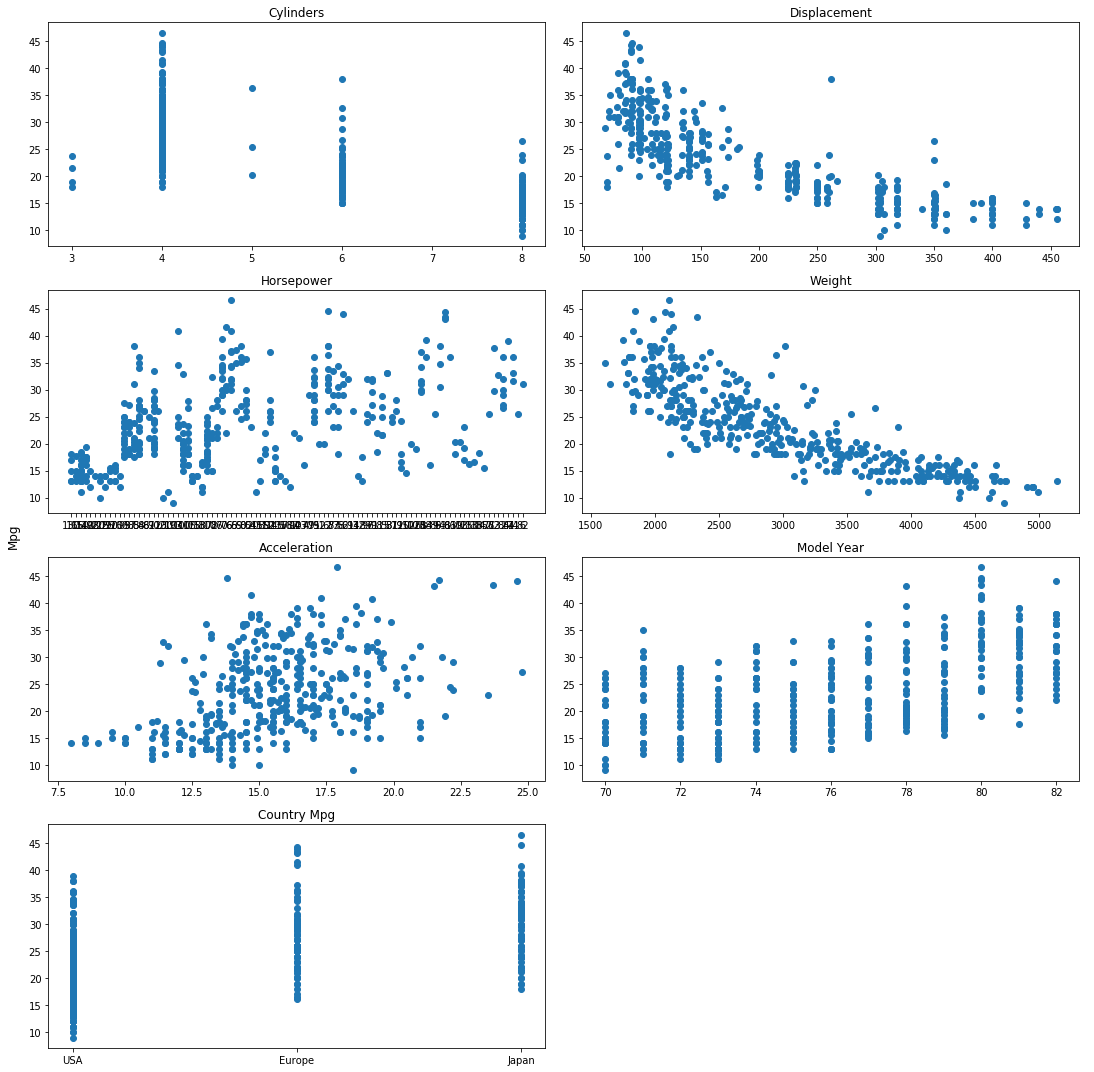

In [55]:
f,axarr = plt.subplots(4,2, figsize=(15,15))
mpgval = df.mpg.values

axarr[0,0].scatter(df.cylinders.values, mpgval)
axarr[0,0].set_title('Cylinders')

axarr[0,1].scatter(df.displacement.values, mpgval)
axarr[0,1].set_title('Displacement')

axarr[1,0].scatter(df.horsepower.values, mpgval)
axarr[1,0].set_title('Horsepower')

axarr[1,1].scatter(df.weight.values, mpgval)
axarr[1,1].set_title('Weight')

axarr[2,0].scatter(df.acceleration.values, mpgval)
axarr[2,0].set_title('Acceleration')

axarr[2,1].scatter(df["model year"].values, mpgval)
axarr[2,1].set_title('Model Year')

axarr[3,0].scatter(df.origin.values, mpgval)
axarr[3,0].set_title('Country Mpg')
# Rename x axis label as USA, Europe and Japan
axarr[3,0].set_xticks([1,2,3])
axarr[3,0].set_xticklabels(["USA","Europe","Japan"])

# Remove the blank plot from the subplots
axarr[3,1].axis("off")

f.text(-0.01, 0.5, 'Mpg', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()